<a href="https://colab.research.google.com/github/anthonyrueckert/FantasyFootballMachineLearning/blob/main/CorrelationMatrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.DataFrame()

WEEKLY_BASE_URL = "https://raw.githubusercontent.com/fantasydatapros/LearnPythonWithFantasyFootball/master/2022/09-Correlation%20Matrices/01-Weekly%20Fantasy%20Stats%20-%202021/{week}.csv"

for week in range(1,18):
  weekly_df = pd.read_csv(WEEKLY_BASE_URL.format(week=week)).iloc[:,1:]
  weekly_df['Week'] = week
  df = pd.concat([df,weekly_df])

print(df.shape)
df.head()

(6800, 20)


,Player,Pos,Tm,PassingYds,PassingTD,Int,PassingAtt,Cmp,RushingAtt,RushingYds,RushingTD,Rec,Tgt,ReceivingYds,ReceivingTD,FL,StandardFantasyPoints,PPRFantasyPoints,HalfPPRFantasyPoints,Week
0,Amari Cooper,WR,DAL,0,0,0,0,0,0,0,0,13,17,139,2,0,25.90,38.90,32.40,1
1,Tyreek Hill,WR,KAN,0,0,0,0,0,1,4,0,11,15,197,1,0,26.10,37.10,31.60,1
2,Patrick Mahomes,QB,KAN,337,3,0,36,27,5,18,1,0,0,0,0,0,33.28,33.28,33.28,1
3,Deebo Samuel,WR,SFO,0,0,0,0,0,0,0,0,9,12,189,1,1,22.90,31.90,27.40,1
4,Kyler Murray,QB,ARI,289,4,1,32,21,5,20,1,0,0,0,0,0,33.56,33.56,33.56,1


In [ ]:
print(df['Pos'].unique())

['WR' 'QB' 'TE' 'RB' 'FB' 'DB' 'OT' 'S' 'SS' 'LB' 'DE' 'CB' 'OLB' 'DT'
 'SAF' 'FS' 'K' 'C' 'P' 'OL' 'T' 'LS' 'G' 'MLB']


In [ ]:
df = df.replace({
    'Pos':{
        'HB':'RB',
        'WR/RS':'WR',
        'WR/PS':'WR',
        'FB/TE':'TE',
        'FB/HB':'RB'
    }
})

In [ ]:
skill_positions = ['QB','RB','WR','TE']

df = df.loc[df['Pos'].isin(skill_positions)]

print(df.shape)

(4739, 20)


In [ ]:
import numpy as np

columns = ['Player','Tm','Pos','Week','PPRFantasyPoints']

new_df = df[columns]

new_df = new_df.groupby(['Player','Tm','Pos'], as_index = False).agg({
    'PPRFantasyPoints': np.mean
})

new_df.head()

,Player,Tm,Pos,PPRFantasyPoints
0,A.J. Brown,TEN,WR,13.675000
1,A.J. Green,ARI,WR,10.033333
2,AJ Dillon,GNB,RB,11.118750
3,Aaron Jones,GNB,RB,15.266667
4,Aaron Rodgers,GNB,QB,21.272000


In [ ]:
rank_map = {
    'QB':1,
    'RB':2,
    'WR':3,
    'TE':2
    }

def get_pos_rank(df,pos,n):
  df = df.loc[df['Pos']==pos]

  return df.groupby('Tm', as_index = False).apply(lambda x: x.nlargest(n,['PPRFantasyPoints']).min())

corr_df = pd.DataFrame(columns = columns)

for pos, n_spots in rank_map.items():
  for n in range(1,n_spots + 1):

    pos_df = get_pos_rank(new_df, pos, n)

    pos_df = pos_df.rename({'PPRFantasyPoints': f'{pos}{n}'}, axis = 1)

    corr_df = pd.concat([corr_df,pos_df], axis = 1)

corr_df = corr_df.dropna(axis = 1)
corr_df = corr_df.drop(['Pos', 'Player', 'Tm'], axis = 1)

print(corr_df.shape)
corr_df.head(32)

(32, 8)


,QB1,RB1,RB2,WR1,WR2,WR3,TE1,TE2
0,21.798462,16.457143,11.941667,14.720000,12.582500,10.033333,11.640000,10.325000
1,13.130000,15.493333,8.525000,14.220000,13.540000,5.864286,10.862500,5.980000
2,19.665000,9.460000,6.916667,14.706667,9.027273,7.822222,17.537500,2.416667
3,23.295000,10.787500,8.483333,16.400000,10.130769,10.013333,11.830769,3.880000
4,12.783636,18.214286,9.800000,13.656250,7.531250,6.125000,5.133333,4.000000
5,14.800000,15.425000,6.957143,12.193750,7.640000,7.345455,8.050000,7.025000
6,19.515000,17.993750,5.942857,18.750000,15.507143,11.490000,8.553333,2.883333
7,12.635714,16.023077,13.500000,10.318182,8.575000,6.933333,8.038462,6.464286
8,18.850667,14.753750,10.440000,15.086667,13.542857,10.166667,11.856250,6.200000
9,14.334286,12.281250,11.900000,10.000000,9.393333,9.081250,10.426667,6.333333


In [ ]:
corr_df.corr()

,QB1,RB1,RB2,WR1,WR2,WR3,TE1,TE2
QB1,1.000000,0.033101,0.074812,0.401286,0.334309,0.431298,0.350721,-0.093717
RB1,0.033101,1.000000,-0.097796,0.022993,0.136996,0.064881,-0.327230,0.007705
RB2,0.074812,-0.097796,1.000000,-0.143657,-0.167622,-0.103962,0.037299,0.234375
WR1,0.401286,0.022993,-0.143657,1.000000,0.419270,0.370441,0.175218,-0.537683
WR2,0.334309,0.136996,-0.167622,0.419270,1.000000,0.685129,0.146986,-0.193476
WR3,0.431298,0.064881,-0.103962,0.370441,0.685129,1.000000,0.170859,-0.184522
TE1,0.350721,-0.327230,0.037299,0.175218,0.146986,0.170859,1.000000,0.051711
TE2,-0.093717,0.007705,0.234375,-0.537683,-0.193476,-0.184522,0.051711,1.000000


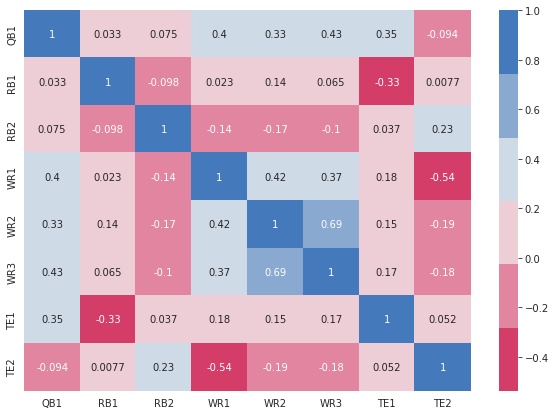

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt

sns.set_style('whitegrid')
plt.figure(figsize = (10,7))

sns.heatmap(corr_df.corr(), annot = True, cmap=sns.diverging_palette(0,250));